<a href="https://colab.research.google.com/github/saghar-trade/deep-learning/blob/main/DAE_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:

!pip install keras

In [16]:
!pip install tensorflow

In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import utils, layers,optimizers,losses, models
import matplotlib.pyplot as plt
import numpy as np




In [19]:
(train_images, train_labels),(test_images,test_labels)=mnist.load_data()

In [20]:
x_train=train_images.reshape(60000,784)
x_test=test_images.reshape(10000,784)

In [21]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
x_train=x_train.reshape (len(x_train),784)
x_test=x_test.reshape (len(x_test),784)
y_train=utils.to_categorical(train_labels)
y_test=utils.to_categorical(test_labels)

# noise_factor=0.5
# x_train_noisy=x_train+noise_factor*np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
# x_test_noisy=x_test+noise_factor*np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
# x_train_noisy=np.clip(x_train_noisy,0. , 1.)
# x_test_noisy=np.clip(x_test_noisy, 0. , 1.)


print('shape of train_label: ',train_labels[0] )
print('shape of y_train :',y_train[0] )

shape of train_label:  5
shape of y_train : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


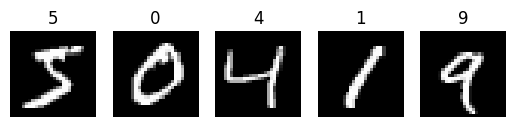

In [22]:
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(train_images[i], cmap='gray')
  plt.title(train_labels[i])
  plt.axis('off')

In [23]:
myModel=models.Sequential()
myModel.add(layers.Dense(500, activation='relu', input_shape=(784,)))
myModel.add(layers.Dense(100, activation='relu'))
myModel.add(layers.Dense(10, activation='softmax'))
myModel.summary()
myModel.compile(optimizer=optimizers.SGD(learning_rate=0.001,momentum=0.9),loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        50,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 443,610 (1.69 MB)

 Trainable params: 443,610 (1.69 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history=myModel.fit(x_train,y_train,batch_size=128, epochs=20,validation_split=0.2 )

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5007 - loss: 1.7733 - val_accuracy: 0.8596 - val_loss: 0.6388
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8624 - loss: 0.5839 - val_accuracy: 0.8953 - val_loss: 0.4123
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8861 - loss: 0.4266 - val_accuracy: 0.9072 - val_loss: 0.3471
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9013 - loss: 0.3601 - val_accuracy: 0.9132 - val_loss: 0.3135
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9104 - loss: 0.3251 - val_accuracy: 0.9197 - val_loss: 0.2912
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9149 - loss: 0.3019 - val_accuracy: 0.9225 - val_loss: 0.2754
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9208 - loss: 0.2813 - val_accuracy: 0.9260 - val_loss: 0.2628
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9232 - loss: 0.2726 - val_accuracy: 0

In [25]:
myModel1=models.Sequential()
myModel1.add(layers.Dense(500, activation='relu', input_shape=(784,)))
myModel1.add(layers.Dense(100, activation='relu'))
myModel1.add(layers.Dense(10, activation='softmax'))
myModel1.summary()
myModel1.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        50,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 443,610 (1.69 MB)

 Trainable params: 443,610 (1.69 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
history1=myModel1.fit(x_train,y_train,batch_size=128, epochs=20,validation_split=0.2 )

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9984 - loss: 0.0054 - val_accuracy: 0.9780 - val_loss: 0.1371
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9969 - loss: 0.0108 - val_accuracy: 0.9783 - val_loss: 0.1184
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9985 - loss: 0.0047 - val_accuracy: 0.9780 - val_loss: 0.1235
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9975 - loss: 0.0084 - val_accuracy: 0.9808 - val_loss: 0.1158
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9995 - loss: 0.0014 - val_accuracy: 0.9833 - val_loss: 0.1124
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9997 - loss: 0.0011 - val_accuracy: 0.9784 - val_loss: 0.1301
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9983 - loss: 0.0061 - val_accuracy: 0.9795 - val_loss: 0.1323
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9975 - loss: 0.0077 - val_accuracy: 0.

Text(0, 0.5, 'Loss')

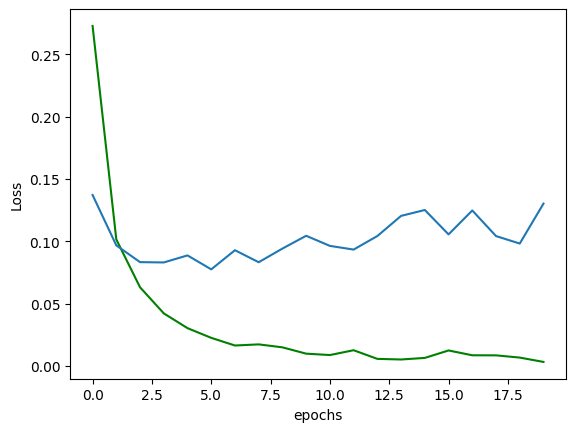

In [29]:
#plot losses
losses=history.history['loss']
val_losses=history.history['val_loss']
plt.plot(losses ,color='g')
plt.plot(val_losses)
plt.xlabel('epochs')
plt.ylabel('Loss')




Text(0, 0.5, 'Loss')

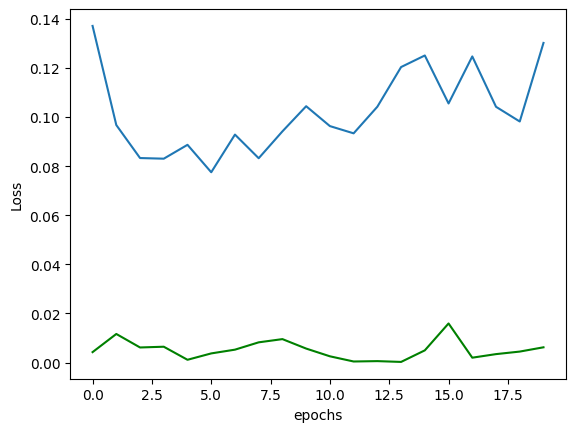

In [30]:
#plot losses
losses=history1.history['loss']
val_losses=history.history['val_loss']
plt.plot(losses ,color='g')
plt.plot(val_losses)
plt.xlabel('epochs')
plt.ylabel('Loss')


In [31]:
#evaluation on test data:
test_loss=myModel1.evaluate(x_test,y_test)
print('test loss: ', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9796 - loss: 0.1202
test loss:  [0.10085239261388779, 0.9825000166893005]


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


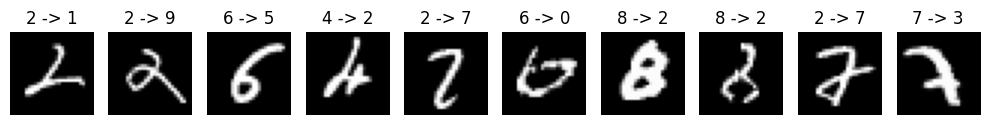

In [40]:
test_labels_p=myModel1.predict(x_test)
test_labels_p=np.argmax(test_labels_p, axis=1)
n=0
f,axs=plt.subplots(1,10,figsize=(10,6))
axs = axs.flatten()
for i in range(len(test_labels)):

  if(test_labels_p[i]!=test_labels[i]):
   axs[n].imshow(test_images[i], cmap='gray')
   axs[n].set_title(f'{test_labels[i]} -> {test_labels_p[i]}')
   axs[n].axis('off')
   n=n+1
  if n>=10 :
    break

plt.tight_layout()
plt.show()

